find the data description here: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

Based on the proposed research question, the target variable will be [leave] which represents how easy it is to take a leave for mental health reasons in a tech company.

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings. simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

df = pd.read_csv('data/survey.csv')

print(df.head())
print(df.shape)

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [2]:
df['Country'].describe()

count              1259
unique               48
top       United States
freq                751
Name: Country, dtype: object

In [3]:
df['tech_company'].describe()

count     1259
unique       2
top        Yes
freq      1031
Name: tech_company, dtype: object

In [4]:
#find missing values
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (1259, 27)
fraction of missing values in features:
state             0.409055
self_employed     0.014297
work_interfere    0.209690
comments          0.869738
dtype: float64
data types of the features with missing values:
state             object
self_employed     object
work_interfere    object
comments          object
dtype: object
fraction of points with missing values: 0.931691818903892


In [5]:
#fill missing state with other
df['state'].fillna(value='Other', inplace=True)

#fill missing self_employed with mode
df['self_employed'].describe()
df['self_employed'].fillna(value='No', inplace=True)

#fill missing work_interfere with Don't know
df['work_interfere'].value_counts()
df['work_interfere'].fillna(value='Don\'t know', inplace=True)

#comment column is dropped later

In [6]:
#drop non-tech company answers:
print("Before Dropping: ", df.shape)
df = df[df['tech_company'] != 'No']
print("After Dropping: ", df.shape)

Before Dropping:  (1259, 27)
After Dropping:  (1031, 27)


In [7]:
#Type of each col
for col_name, dtype in df.dtypes.to_dict().items():
    print(col_name + ": " + str(dtype))

Timestamp: object
Age: int64
Gender: object
Country: object
state: object
self_employed: object
family_history: object
treatment: object
work_interfere: object
no_employees: object
remote_work: object
tech_company: object
benefits: object
care_options: object
wellness_program: object
seek_help: object
anonymity: object
leave: object
mental_health_consequence: object
phys_health_consequence: object
coworkers: object
supervisor: object
mental_health_interview: object
phys_health_interview: object
mental_vs_physical: object
obs_consequence: object
comments: object


Note that age is the only continuous variable in this data set

In [8]:
#target variable
df['leave'].describe()

count           1031
unique             5
top       Don't know
freq             456
Name: leave, dtype: object

<Figure size 640x480 with 0 Axes>

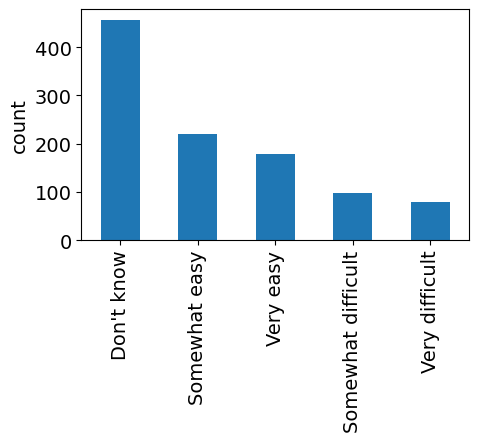

In [9]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

plt.figure()
plt.rcParams.update({'font.size': 14})

#bar graph for target variable
plt.figure(figsize=(5,3))
pd.value_counts(df['leave']).plot.bar()
plt.ylabel('count')
plt.show()

For people who answered Don't know, what are the correlation between their answer and their take on if discussing a mental health issue with employer would have negative consequences.

In [10]:
dont_know = df[df['leave']=='Don\'t know']
dont_know['mental_health_consequence'].describe()

count       456
unique        3
top       Maybe
freq        208
Name: mental_health_consequence, dtype: object

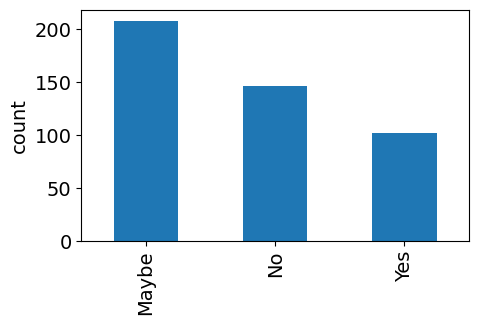

In [11]:
#distribution of take on mental_health_concequence for people answered don't know to if taking a leave is easy
plt.figure(figsize=(5,3))
pd.value_counts(dont_know['mental_health_consequence']).plot.bar()
plt.ylabel('count')
plt.show()

mental_health_consequence     Maybe        No       Yes
leave                                                  
Don't know                 0.456140  0.320175  0.223684
Somewhat difficult         0.275510  0.316327  0.408163
Somewhat easy              0.378995  0.525114  0.095890
Very difficult             0.265823  0.113924  0.620253
Very easy                  0.206704  0.720670  0.072626


<Figure size 500x300 with 0 Axes>

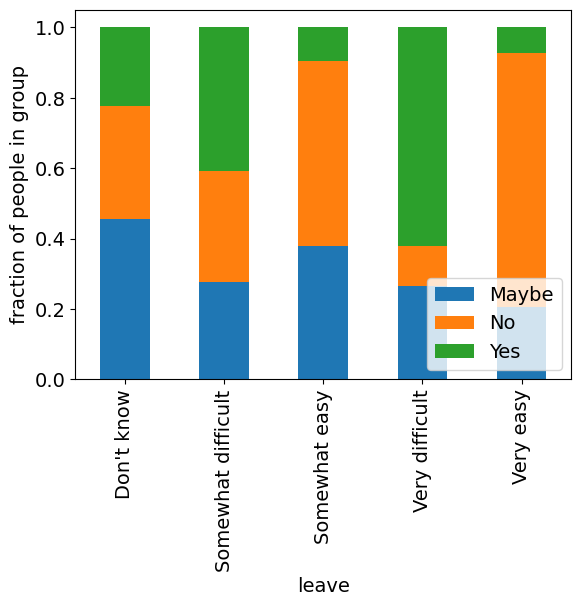

In [12]:
#correlation between mental_health_consequence and leave
count_matrix = df.groupby(['leave', 'mental_health_consequence']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

count    1.031000e+03
mean     9.699324e+07
std      3.114373e+09
min     -1.000000e+00
25%      2.700000e+01
50%      3.100000e+01
75%      3.500000e+01
max      1.000000e+11
Name: Age, dtype: float64
count    1025.000000
mean       31.878049
std         7.151114
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        62.000000
Name: Age, dtype: float64


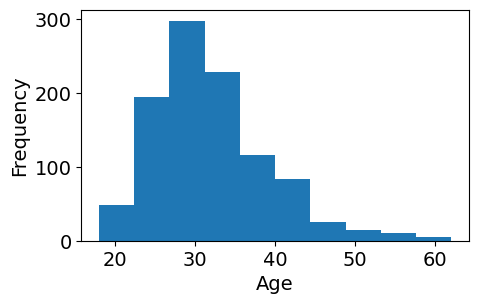

In [13]:
#distribution of age in the survey population
print(df['Age'].describe())

#drop wrong values
df = df[df['Age'] < 90]
df = df[df['Age'] > 15]

#check if the wrong age is droped
print(df['Age'].describe())

plt.figure(figsize = (5,3))
df['Age'].plot.hist(bins = 10) 
plt.xlabel('Age')

plt.show()

<Figure size 500x300 with 0 Axes>

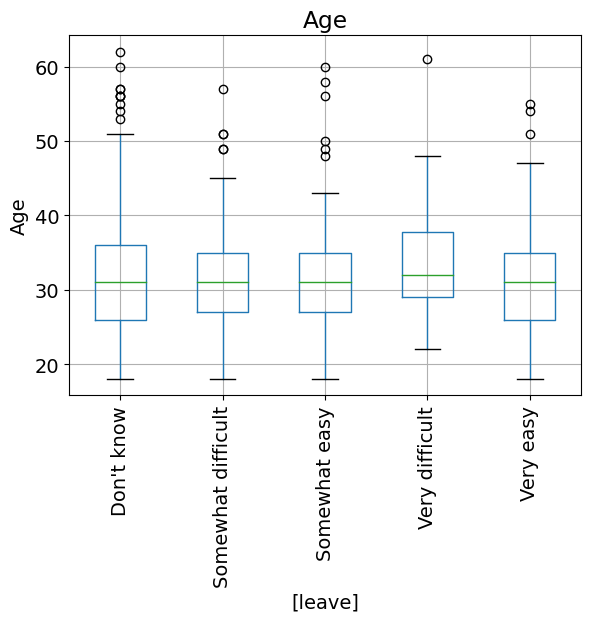

In [14]:
#correlation between age and leave
plt.figure(figsize = (5,3))
df[['Age','leave']].boxplot(by='leave')
plt.ylabel('Age')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

anonymity           Don't know        No       Yes
leave                                             
Don't know            0.819780  0.015385  0.164835
Somewhat difficult    0.581633  0.153061  0.265306
Somewhat easy         0.577982  0.018349  0.403670
Very difficult        0.564103  0.205128  0.230769
Very easy             0.465909  0.034091  0.500000


<Figure size 500x300 with 0 Axes>

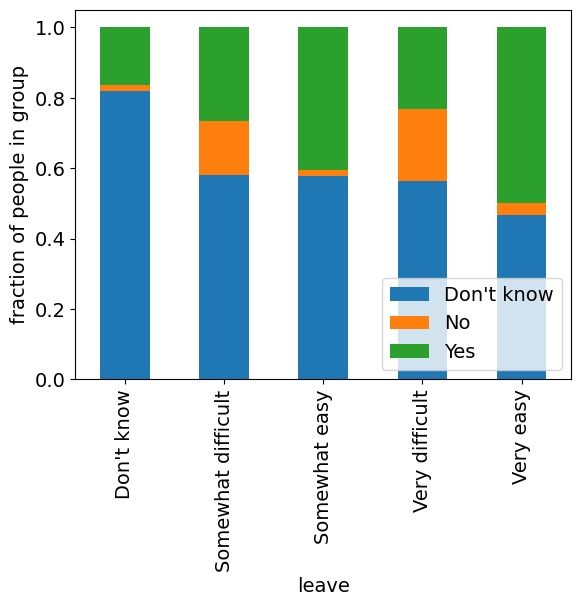

In [15]:
#correlation between anonymity and leave
count_matrix = df.groupby(['leave', 'anonymity']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [16]:
#gender describe
df['Gender'].describe()

count     1025
unique      39
top       Male
freq       510
Name: Gender, dtype: object

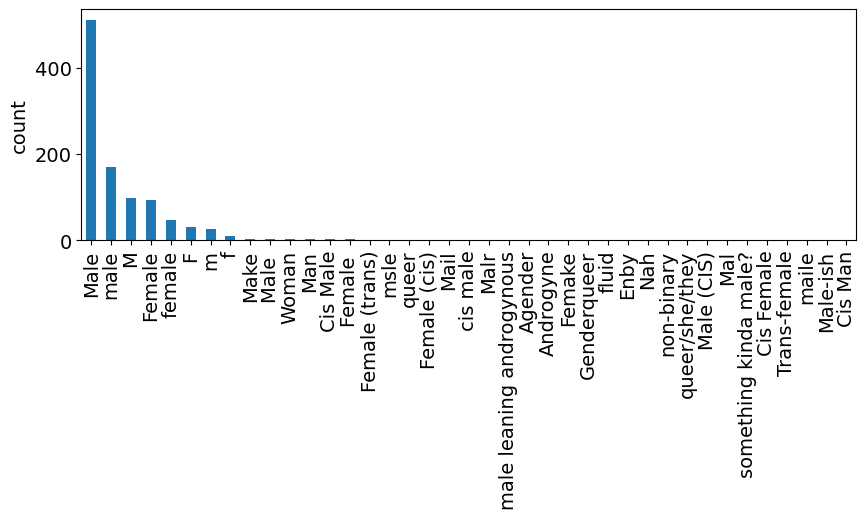

In [17]:
#gender bar plot
plt.figure(figsize=(10,3))
pd.value_counts(df['Gender']).plot.bar()
plt.ylabel('count')
plt.show()

Due to the sensitivity in gender, I'm not going to preprocess gender feautre for now

obs_consequence           No       Yes
leave                                 
Don't know          0.898901  0.101099
Somewhat difficult  0.673469  0.326531
Somewhat easy       0.903670  0.096330
Very difficult      0.679487  0.320513
Very easy           0.926136  0.073864


<Figure size 500x300 with 0 Axes>

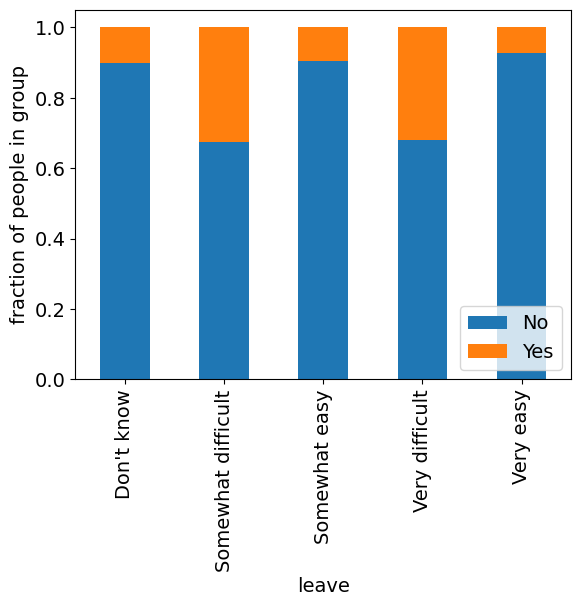

In [18]:
#obs_consequence and leave correlation
count_matrix = df.groupby(['leave', 'obs_consequence']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

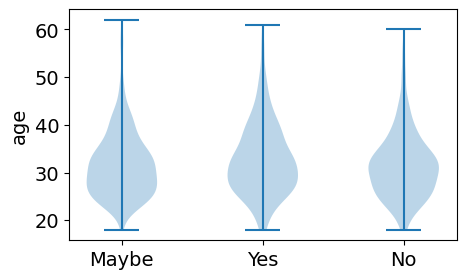

In [19]:
#correlation between age and mental_health_consequence
plt.figure(figsize = (5,3))

dataset = [df[df['mental_health_consequence']=='Maybe']['Age'].values,
           df[df['mental_health_consequence']=='Yes']['Age'].values,
          df[df['mental_health_consequence' ]=='No']['Age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Maybe','Yes','No'])
plt.ylabel('age')
plt.show()

mental_health_consequence     Maybe        No       Yes
phys_health_consequence                                
Maybe                      0.588517  0.038278  0.373206
No                         0.324219  0.546875  0.128906
Yes                        0.062500       NaN  0.937500


<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

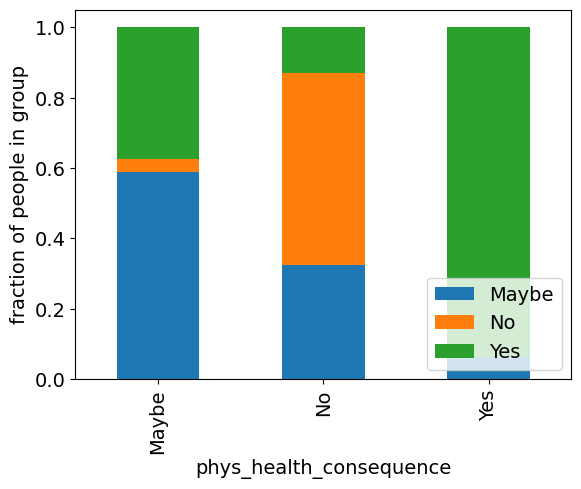

In [20]:
#phys_health_consequence and meantal_health_consequence correlation
plt.figure()
plt.rcParams.update({'font.size': 14})

count_matrix = df.groupby(['phys_health_consequence', 'mental_health_consequence']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(10,6))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [21]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [22]:
#balance of leave
df['leave'].value_counts()

Don't know            455
Somewhat easy         218
Very easy             176
Somewhat difficult     98
Very difficult         78
Name: leave, dtype: int64

In [23]:
#balance of mental_health_consequence
df['mental_health_consequence'].value_counts()

No       428
Maybe    375
Yes      222
Name: mental_health_consequence, dtype: int64

In [24]:
#splitting the data: no group, but imbalance, iid --stratifiedKfold and shuffle
#In reality, if we take into consideration company, which makes group, the data will not be iid.
#However, we do not know how the survey is distributed, and since the company is not specified, 
#I am going to assume the data is iid
#dropping comments, timestamp as it has no effect on the model

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

y = df['leave']
X = df.drop(columns= ['leave', 'comments', 'Timestamp', 'tech_company'])
random_state = 37

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('training set:',X_train.shape, y_train.shape) 
    print('validation set:',X_val.shape, y_val.shape) 
    print('test set: ', X_test.shape, y_test.shape)
    
print('\n')
#check reproducibility
print(X_train.head(1))
print(X_val.head(1))
print(X_test.head(1))

test balance: (array(["Don't know", 'Somewhat difficult', 'Somewhat easy',
       'Very difficult', 'Very easy'], dtype=object), array([91, 19, 44, 16, 35]))
training set: (656, 23) (656,)
validation set: (164, 23) (164,)
test set:  (205, 23) (205,)
training set: (656, 23) (656,)
validation set: (164, 23) (164,)
test set:  (205, 23) (205,)
training set: (656, 23) (656,)
validation set: (164, 23) (164,)
test set:  (205, 23) (205,)
training set: (656, 23) (656,)
validation set: (164, 23) (164,)
test set:  (205, 23) (205,)
training set: (656, 23) (656,)
validation set: (164, 23) (164,)
test set:  (205, 23) (205,)


      Age Gender Country  state self_employed family_history treatment  \
1167   34   male  Poland  Other            No             No        No   

     work_interfere    no_employees remote_work  ... seek_help   anonymity  \
1167          Never  More than 1000         Yes  ...        No  Don't know   

     mental_health_consequence phys_health_consequence     coworkers  \
11

In [25]:
#preprocess the splitted data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

#age is tailed, so use standard instead of minmax
std_ftrs = ['Age']
onehot_ftrs = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', \
               'work_interfere', 'no_employees', 'remote_work', 'benefits', 'care_options', \
               'wellness_program', 'seek_help', 'anonymity','mental_health_consequence', \
               'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', \
               'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

preprocessor = ColumnTransformer(transformers=[
    ('std', StandardScaler(), std_ftrs),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(656, 23)
(656, 169)
[[ 0.30775232  0.          0.         ...  0.          1.
   0.        ]
 [-0.55072615  0.          0.         ...  1.          1.
   0.        ]
 [ 0.45083206  0.          0.         ...  0.          1.
   0.        ]
 ...
 [-0.26456666  0.          0.         ...  0.          1.
   0.        ]
 [ 0.5939118   0.          0.         ...  0.          1.
   0.        ]
 [ 0.45083206  0.          0.         ...  0.          1.
   0.        ]]


In [26]:
#correlation matrix
import seaborn as sns

df1 = pd.DataFrame(X_train_prep)
df1.corr()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,1.000000,-0.060653,-0.021519,-0.027109,0.006434,-0.004747,-0.037387,-0.100220,0.006434,-0.021519,...,0.024627,0.064592,0.021250,0.006829,-0.037465,0.001609,0.014342,-0.015167,-0.027663,0.027663
1,-0.060653,1.000000,-0.001527,-0.001527,-0.001527,-0.001527,-0.007448,-0.012847,-0.001527,-0.001527,...,0.020906,-0.007448,-0.036872,0.051612,-0.017346,-0.035430,-0.022284,0.059212,0.015480,-0.015480
2,-0.021519,-0.001527,1.000000,-0.001527,-0.001527,-0.001527,-0.007448,-0.012847,-0.001527,-0.001527,...,-0.073028,0.204983,-0.036872,0.051612,-0.017346,-0.035430,0.068512,-0.025784,-0.098622,0.098622
3,-0.027109,-0.001527,-0.001527,1.000000,-0.001527,-0.001527,-0.007448,-0.012847,-0.001527,-0.001527,...,0.020906,-0.007448,0.041406,-0.029581,-0.017346,-0.035430,-0.022284,0.059212,0.015480,-0.015480
4,0.006434,-0.001527,-0.001527,-0.001527,1.000000,-0.001527,-0.007448,-0.012847,-0.001527,-0.001527,...,0.020906,-0.007448,0.041406,-0.029581,-0.017346,-0.035430,0.068512,-0.025784,0.015480,-0.015480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.001609,-0.035430,-0.035430,-0.035430,-0.035430,-0.035430,-0.039606,-0.019389,-0.035430,-0.035430,...,0.013831,0.027013,-0.051716,0.051934,0.002216,1.000000,-0.517136,-0.598361,0.117714,-0.117714
165,0.014342,-0.022284,0.068512,-0.022284,0.068512,-0.022284,-0.012418,0.039309,-0.022284,0.068512,...,0.134825,-0.050935,0.057930,-0.056361,-0.004834,-0.517136,1.000000,-0.376339,-0.249888,0.249888
166,-0.015167,0.059212,-0.025784,0.059212,-0.025784,0.059212,0.054497,-0.015809,0.059212,-0.025784,...,-0.141184,0.018440,0.001752,-0.003456,0.002126,-0.598361,-0.376339,1.000000,0.106504,-0.106504
167,-0.027663,0.015480,-0.098622,0.015480,0.015480,0.015480,-0.021287,-0.079770,0.015480,-0.098622,...,-0.094260,0.002915,-0.027448,0.003934,0.031839,0.117714,-0.249888,0.106504,1.000000,-1.000000


<AxesSubplot:>

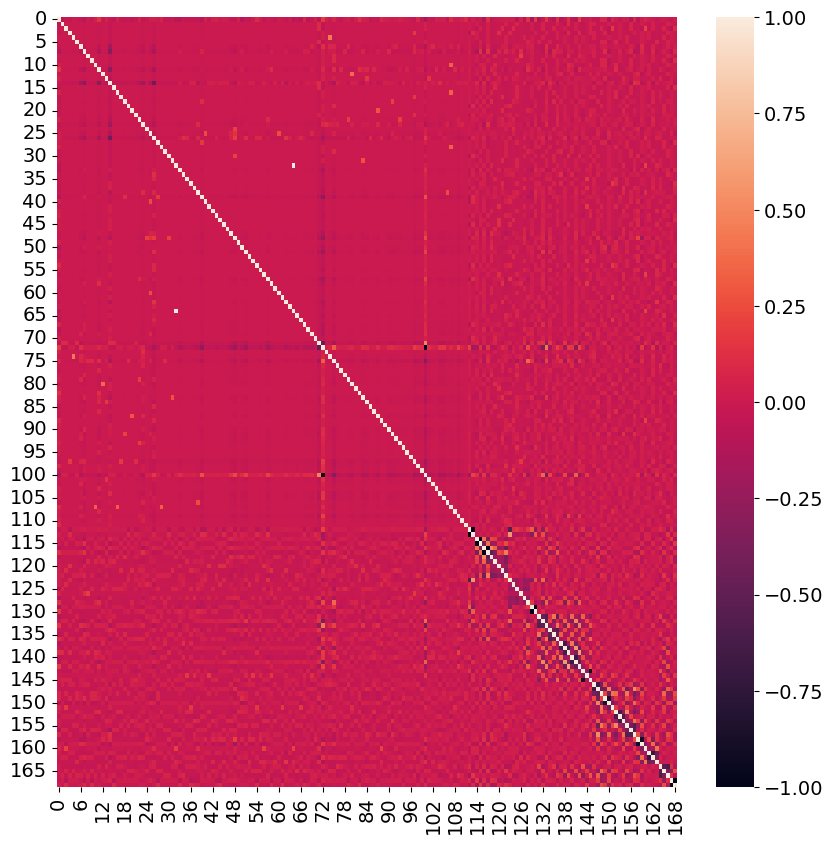

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), vmin=-1, vmax=1)

In [28]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      824
Female    188
Other      13
Name: Gender, dtype: int64

In [29]:
#df = df[df['Country'] != 'United States']

In [30]:
df['leave'].describe()

count           1025
unique             5
top       Don't know
freq             455
Name: leave, dtype: object

In [31]:
#baseline accuracy
baseline_acc = df[df['leave'] == 'Don\'t know'].shape[0]/df['leave'].shape[0]
print(baseline_acc)

0.44390243902439025


In [32]:
#splitting, preprocessing, and train data using different random_state to verify result
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#age is tailed, so use standard instead of minmax
std_ftrs = ['Age']
onehot_ftrs = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', \
               'work_interfere', 'no_employees', 'remote_work', 'benefits', 'care_options', \
               'wellness_program', 'seek_help', 'anonymity','mental_health_consequence', \
               'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', \
               'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

preprocessor = ColumnTransformer(transformers=[
    ('std', StandardScaler(), std_ftrs),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs)])


In [33]:
#drop gender
#XGB
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

param_grid = {#"learning_rate": [0.03],
              #"n_estimators": [10000],
              #"seed": [0],
              #"reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              #"reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              #"missing": [np.nan], 
              "max_depth": [1,3,10,30,100],
              #"colsample_bytree": [0.9],              
              "subsample": [0.5]
                }   
#dropped country, changed gender, 
y = df['leave']
X = df.drop(columns= ['leave', 'comments', 'Timestamp', 'tech_company'])

nr_states = 10
test_scores = np.zeros(nr_states)
final_models = []
test_sets = []
test_ys = []
test_preps = []
df_trains = []

for i in range(nr_states):
    
    print('randoms state '+str(i+1))
    
    random_state = i + 1
    
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
    
    # do StratifiedKFold split on other
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
    
    test_sets.append(X_test)
    test_ys.append(y_test)
    # fit_transform the training set
    X_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()

    df_train = pd.DataFrame(data=X_prep,columns=feature_names)
    #print(df_train.shape)

    # transform the CV
    df_val = preprocessor.transform(X_val)
    df_val = pd.DataFrame(data=df_val,columns = feature_names)
    #print(df_val.shape)

    # transform the test
    df_test = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=df_test,columns = feature_names)
    #print(df_test.shape)
    
    test_preps.append(df_test)
    
    df_trains.append(df_train)
    
    #print(df_train.shape)
    #hm = sn.heatmap(df_train.corr(), vmin=-1, vmax=1)
    #plt.show()
    
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params)
        XGB = xgboost.XGBClassifier(random_state=37*i, n_jobs=-1)
        XGB.set_params(**params)
        XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_val, y_val)], verbose=False) 
        models.append(XGB)
        
        #train and validation accuracy scores
        y_train_pred = XGB.predict(df_train)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = XGB.predict(df_val)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        print('   ',train_score[p],val_score[p])
    
    # print out model parameters that maximize validation accuracy
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(df_test)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])

randoms state 1
    {'subsample': 0.5, 'max_depth': 1}
[22:38:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    0.5792682926829268 0.49390243902439024
    {'subsample': 0.5, 'max_depth': 3}
[22:38:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    0.614329268292683 0.4451219512195122
    {'subsample': 0.5, 'max_depth': 10}
[22:38:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the defaul

    0.899390243902439 0.4451219512195122
best model parameters: {'subsample': 0.5, 'max_depth': 1}
corresponding validation score: 0.5
test score: 0.4585365853658537
randoms state 5
    {'subsample': 0.5, 'max_depth': 1}
[22:38:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    0.5396341463414634 0.5060975609756098
    {'subsample': 0.5, 'max_depth': 3}
[22:38:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    0.6417682926829268 0.4817073170731707
    {'subsample': 0.

    0.9176829268292683 0.47560975609756095
best model parameters: {'subsample': 0.5, 'max_depth': 3}
corresponding validation score: 0.5426829268292683
test score: 0.47317073170731705
randoms state 9
    {'subsample': 0.5, 'max_depth': 1}
[22:38:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    0.5487804878048781 0.5426829268292683
    {'subsample': 0.5, 'max_depth': 3}
[22:38:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    0.6859756097560976 0.5304878048780488
  

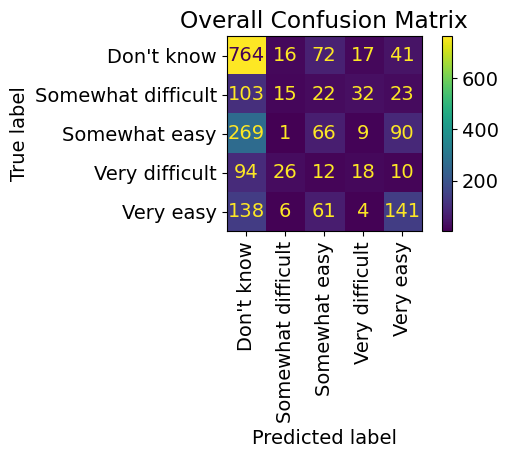

In [34]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_test_preds = []
y_test_trues = []

for i in range(len(test_sets)):
    y_test_pred = final_models[i].predict(test_preps[i])
    y_test_preds.append(y_test_pred.tolist())
    y_test_trues.append(test_ys[i])

y_pred = []
y_true = []


for m in range(len(y_test_preds)):
    for n in range (len(y_test_preds[m])):
        y_pred.append(y_test_preds[m][n])
        y_true.append(y_test_trues[m].tolist()[n])
#print(y_pred)

cm = confusion_matrix(y_true,y_pred)
#print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Don\'t know', 'Somewhat difficult', 'Somewhat easy',
                                                   'Very difficult', 'Very easy' ])
disp.plot()
plt.title('Overall Confusion Matrix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [35]:
#XGB
print('Test Accuracy Mean', test_scores.mean())
print('Test Accuracy Standard Deviation', test_scores.std())

Test Accuracy Mean 0.4897560975609757
Test Accuracy Standard Deviation 0.019898612735971846


In [110]:
# read in the data and add your function in this cell
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

random_state = 37
def MLpipe_KFold_Acc(X, y, preprocessor, clf, param_grid): #clf is the model chosen, initialized
    global final_models
    global test_scores
    global y_pred
    global y_true
    global X_tests
    global y_tests
    global X_trains
    global y_trains
    X_trains = []
    y_trains = []
    X_tests = []
    y_tests = []
    y_pred = []
    y_true = []
    final_models = []
    test_scores = np.zeros(10)
    #for 10 different 10 random states
    for i in range(10):
        #print(i)
        #print(test_scores)
        # split 80-20
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2, stratify=y,
                                                            random_state=random_state*i)
        X_tests.append(X_test)
        y_tests.append(y_test)
        
        
        # do StratifiedKFold split on other
        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state*i)
        for train_index, val_index in kf.split(X_other,y_other):
            X_train = X_other.iloc[train_index]
            y_train = y_other.iloc[train_index]
            X_val = X_other.iloc[val_index]
            y_val = y_other.iloc[val_index]
            
        X_trains.append(X_train)
        y_trains.append(y_train)
        #preprocess data
        pipe = make_pipeline(preprocessor,clf)
        
        #print(X_train.shape)
        #cross validation
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                    cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        
        # fit the model
        grid.fit(X_other, y_other)
        #print(X_train.shape)
        
        results = pd.DataFrame(grid.cv_results_)

        # save the model
        final_models.append(grid)
    
        print('best model parameters:',grid.best_params_)
        print('validation score:',abs(grid.best_score_))
        y_test_pred = final_models[i].predict(X_test)
        test_scores[i] = accuracy_score(y_test,y_test_pred)
        y_true.append(y_test)
        y_pred.append(y_test_pred)
        print('test score:',test_scores[i])
    return grid, X_test, y_test

In [39]:
#print(test_scores)

In [43]:
#KNN
import warnings
warnings.filterwarnings("ignore")
warnings. simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(metric_params={'kneighborsclassifier__keepdims': True})
param_grid = {'kneighborsclassifier__n_neighbors': [1, 3, 10, 30, 100, 300],
              'kneighborsclassifier__weights': ['uniform', 'distance']}
MLpipe_KFold_Acc(X, y, preprocessor, clf, param_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **pr

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

best model parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.4902439024390244
test score: 0.526829268292683
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **pr

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors

best model parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.4902439024390244
test score: 0.47804878048780486
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **pr

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **pr

best model parameters: {'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.4853658536585366
test score: 0.4975609756097561
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.4987804878048781
test score: 0.44390243902439025
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **pr

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors

best model parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.4975609756097561
test score: 0.4975609756097561
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **pr

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

best model parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.48048780487804876
test score: 0.5170731707317073
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.4914634146341464
test score: 0.4926829268292683
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

best model parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.47926829268292687
test score: 0.4975609756097561
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value

best model parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.5085365853658537
test score: 0.5024390243902439
Fitting 5 folds for each of 12 candidates, totalling 60 fits


kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. I

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.py:458: UserWarning: Some metric_kwargs have been passed ({'kneighborsclassifier__keepdims': True}) but aren't usable for this case (FastEuclideanPairwiseDistancesArgKmin) and will be ignored.
  return self.steps[-1][1].predict(Xt, **predict_params)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Murphy/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/pipeline.

best model parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.4939024390243903
test score: 0.47317073170731705


(GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=333, shuffle=True),
              estimator=Pipeline(steps=[('columntransformer',
                                         ColumnTransformer(transformers=[('std',
                                                                          StandardScaler(),
                                                                          ['Age']),
                                                                         ('onehot',
                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                        sparse=False),
                                                                          ['Gender',
                                                                           'Country',
                                                                           'state',
                                                

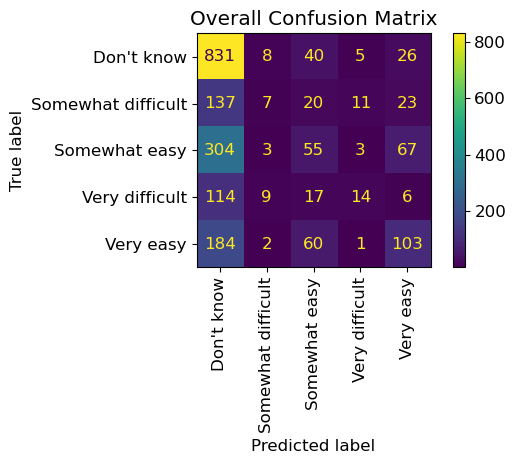

In [44]:
y_pred1 = []
y_true1 = []
for m in range(len(y_pred)):
    for n in range (len(y_pred[m])):
        y_pred1.append(y_pred[m][n])
        y_true1.append(y_true[m].tolist()[n])
#print(y_pred1)
font = {'size'   : 12}
plt.rc('font', **font)

cm = confusion_matrix(y_true1,y_pred1)
#print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Don\'t know', 'Somewhat difficult', 'Somewhat easy',
                                                   'Very difficult', 'Very easy' ])
disp.plot()
plt.title('Overall Confusion Matrix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
#KNN
print(test_scores.mean())
print(test_scores.std())

0.4926829268292682
0.0221401087178736


In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=100000, random_state = 37)
param_grid = {'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none']}

MLpipe_KFold_Acc(X, y, preprocessor, clf, param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best model parameters: {'logisticregression__penalty': 'l2'}
validation score: 0.4463414634146342
test score: 0.5073170731707317
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best model parameters: {'logisticregression__penalty': 'l2'}
validation score: 0.4609756097560975
test score: 0.4682926829268293
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best model parameters: {'logisticregression__penalty': 'l2'}
validation score: 0.45
test score: 0.4975609756097561
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best model parameters: {'logisticregression__penalty': 'l2'}
validation score: 0.46341463414634143
test score: 0.43414634146341463
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best model parameters: {'logisticregression__penalty': 'l2'}
validation score: 0.46951219512195125
test score: 0.45365853658536587
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best 

(GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=333, shuffle=True),
              estimator=Pipeline(steps=[('columntransformer',
                                         ColumnTransformer(transformers=[('std',
                                                                          StandardScaler(),
                                                                          ['Age']),
                                                                         ('onehot',
                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                        sparse=False),
                                                                          ['Gender',
                                                                           'Country',
                                                                           'state',
                                                

In [47]:
'''a = final_models[1].predict(X_test)
b = accuracy_score(y_test, a)
print(final_models)'''

'a = final_models[1].predict(X_test)\nb = accuracy_score(y_test, a)\nprint(final_models)'

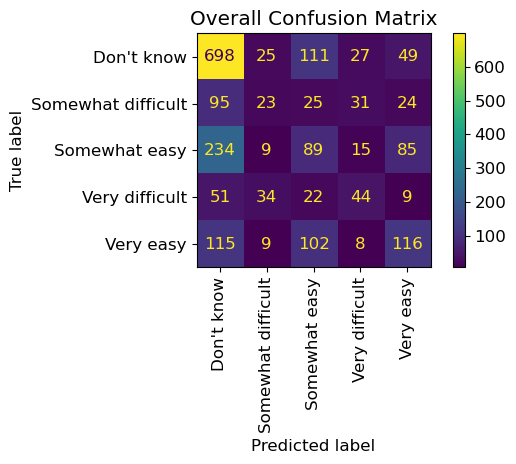

In [48]:
y_pred1 = []
y_true1 = []
for m in range(len(y_pred)):
    for n in range (len(y_pred[m])):
        y_pred1.append(y_pred[m][n])
        y_true1.append(y_true[m].tolist()[n])
#print(y_pred1)

font = {'size'   : 12}
plt.rc('font', **font)

cm = confusion_matrix(y_true1,y_pred1)
#print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Don\'t know', 'Somewhat difficult', 'Somewhat easy',
                                                   'Very difficult', 'Very easy' ])
disp.plot()
#plt.figure(figsize=(10,10))
plt.title('Overall Confusion Matrix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [49]:
#Logistic Regression
print(test_scores.mean())
print(test_scores.std())

0.47317073170731716
0.024584591548008104


In [77]:
#RF
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=37)
param_grid = {'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], 
              'randomforestclassifier__max_features': [0.5,0.75,1.0]}

grid, X_test, y_test = MLpipe_KFold_Acc(X, y, preprocessor, clf, param_grid)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
validation score: 0.4902439024390244
test score: 0.4926829268292683
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.5060975609756098
test score: 0.48292682926829267
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
validation score: 0.4878048780487805
test score: 0.4975609756097561
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 1.0}
validation score: 0.5036585365853659
test score: 0.47804878048780486
Fitting 5 folds for each of 15 candidates, t

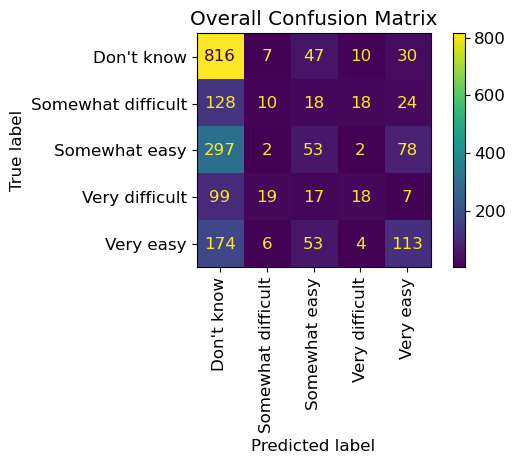

In [74]:
y_pred1 = []
y_true1 = []
for m in range(len(y_pred)):
    for n in range (len(y_pred[m])):
        y_pred1.append(y_pred[m][n])
        y_true1.append(y_true[m].tolist()[n])
#print(y_pred1)

font = {'size'   : 12}
plt.rc('font', **font)

cm = confusion_matrix(y_true1, y_pred1)

#print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Don\'t know', 'Somewhat difficult', 'Somewhat easy',
                                                   'Very difficult', 'Very easy' ])
disp.plot()
plt.title('Overall Confusion Matrix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [75]:
#RF
print(test_scores.mean())
print(test_scores.std())

0.4926829268292682
0.013968605915391577


In [79]:
grid.best_estimator_[1].feature_importances_

array([9.36287395e-02, 1.02865889e-02, 7.94692397e-03, 1.86867519e-03,
       6.26457834e-03, 1.00111871e-03, 1.16754729e-03, 0.00000000e+00,
       6.83388550e-04, 1.01368810e-03, 1.10347070e-02, 2.32610103e-04,
       1.49079240e-03, 1.46208622e-04, 1.16554332e-04, 1.49544287e-04,
       8.56273286e-04, 2.15328555e-03, 7.15556852e-03, 2.01085016e-04,
       1.20405627e-03, 3.83762332e-03, 1.12429676e-03, 5.10815842e-04,
       5.58928121e-04, 6.93670496e-05, 4.67183098e-04, 4.91795581e-04,
       5.65441534e-03, 5.16044119e-04, 6.83154421e-05, 1.17269238e-03,
       1.92116031e-04, 8.55440168e-04, 5.95997712e-04, 1.49734606e-04,
       1.28279739e-03, 2.82748910e-04, 6.61668601e-04, 0.00000000e+00,
       3.12732388e-04, 1.67966410e-03, 9.47147158e-03, 1.35608684e-02,
       0.00000000e+00, 3.51226222e-04, 5.38696985e-04, 9.84502009e-03,
       1.72201724e-03, 0.00000000e+00, 1.23999025e-03, 3.74178691e-03,
       5.07196720e-03, 5.79408319e-04, 8.86850959e-05, 4.85620177e-03,
      

Text(0.5, 1.0, 'Random Forest Built-in Feature Importance')

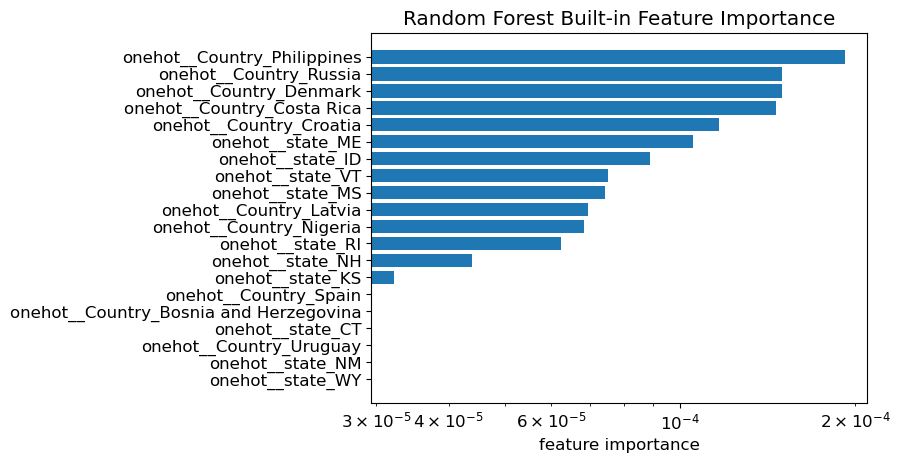

In [96]:
#RF built-in feature importance
sorted_indexes = grid.best_estimator_[1].feature_importances_.argsort()[:20]
plt.barh(grid.best_estimator_[0].get_feature_names_out()[sorted_indexes], 
         grid.best_estimator_[1].feature_importances_[sorted_indexes])
plt.semilogx()
plt.xlabel('feature importance')
plt.title('Random Forest Built-in Feature Importance')


In [97]:
#SVC
from sklearn.svm import SVC

clf = SVC(random_state = 37, probability=True)
param_grid = {'svc__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
              'svc__C': [1e-1, 1e0, 1e1]}

grid, X_test, y_test = MLpipe_KFold_Acc(X, y, preprocessor, clf, param_grid)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.001}
validation score: 0.4890243902439025
test score: 0.5024390243902439
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.4902439024390244
test score: 0.4878048780487805
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.001}
validation score: 0.4853658536585366
test score: 0.526829268292683
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.5207317073170732
test score: 0.47317073170731705
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.5060975609756098
test score: 0.5170731707317073
Fitting 5 folds for each of 15 candidates, totalling 75 fit

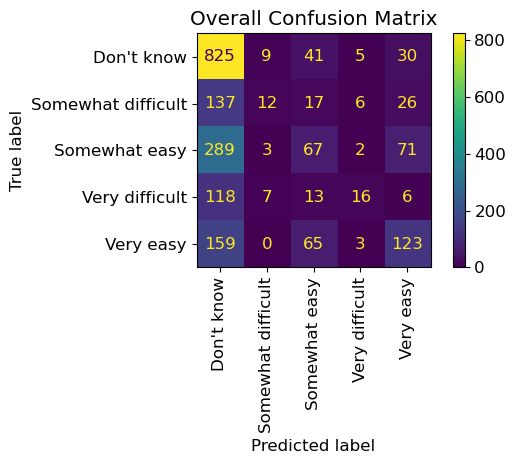

In [98]:
y_pred1 = []
y_true1 = []
for m in range(len(y_pred)):
    for n in range (len(y_pred[m])):
        y_pred1.append(y_pred[m][n])
        y_true1.append(y_true[m].tolist()[n])
#print(y_pred1)

font = {'size'   : 12}
plt.rc('font', **font)

cm = confusion_matrix(y_true1,y_pred1)
#print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Don\'t know', 'Somewhat difficult', 'Somewhat easy',
                                                   'Very difficult', 'Very easy' ])
disp.plot()
#plt.figure(figsize=(10,10))
plt.title('Overall Confusion Matrix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [99]:
#SVC
print(test_scores.mean())
print(test_scores.std())

0.5087804878048781
0.02487804878048782


In [124]:
#SVC - most predictive model
#feature importance permutation
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")

ftr_names = X.columns

np.random.seed(37)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])
y_test_pred = final_models[4].predict(X_tests[4])
test_score = accuracy_score(y_tests[4],y_test_pred)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_tests[4] == 'Don\'t know')/len(y_tests[4]))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_tests[4].copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_tests[4][ftr_names[i]].values)
        y_pred = final_models[4].predict(X_test_shuffled)
        acc = accuracy_score(y_tests[4],y_pred)
        acc_scores.append(acc)
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.5170731707317073
test baseline =  0.44390243902439025
shuffling Age
   shuffled test score: 0.509 +/- 0.008
shuffling Gender
   shuffled test score: 0.507 +/- 0.009
shuffling Country
   shuffled test score: 0.515 +/- 0.011
shuffling state
   shuffled test score: 0.497 +/- 0.007
shuffling self_employed
   shuffled test score: 0.511 +/- 0.003
shuffling family_history
   shuffled test score: 0.511 +/- 0.007
shuffling treatment
   shuffled test score: 0.502 +/- 0.005
shuffling work_interfere
   shuffled test score: 0.498 +/- 0.012
shuffling no_employees
   shuffled test score: 0.491 +/- 0.008
shuffling remote_work
   shuffled test score: 0.492 +/- 0.013
shuffling benefits
   shuffled test score: 0.507 +/- 0.011
shuffling care_options
   shuffled test score: 0.498 +/- 0.012
shuffling wellness_program
   shuffled test score: 0.521 +/- 0.006
shuffling seek_help
   shuffled test score: 0.504 +/- 0.005
shuffling anonymity
   shuffled test score: 0.481 +/- 0.013
shuffling mental_

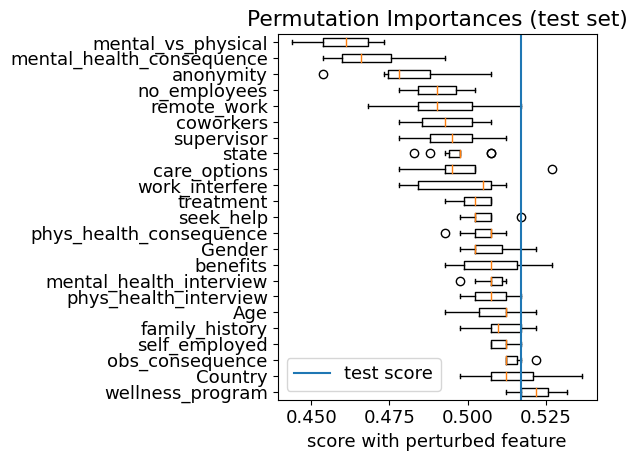

In [144]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,4.8))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sklearn Permutation Importance on SVC')

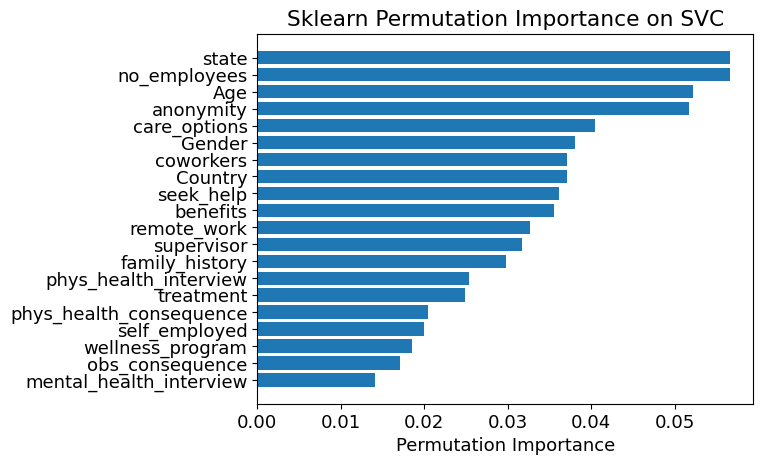

In [131]:
# SVC feature importance
perm_importance = permutation_importance(final_models[4], X_test, y_test, n_repeats=10, random_state=37)

features = X.columns
features = np.asarray(features)

sorted_idx = perm_importance.importances_mean.argsort()[:20]
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title('Sklearn Permutation Importance on SVC')

In [102]:
perm_importance.importances_mean

array([0.05219512, 0.03804878, 0.03707317, 0.05658537, 0.02      ,
       0.0297561 , 0.02487805, 0.05707317, 0.05658537, 0.03268293,
       0.03560976, 0.0404878 , 0.01853659, 0.03609756, 0.05170732,
       0.0604878 , 0.0204878 , 0.03707317, 0.03170732, 0.01414634,
       0.02536585, 0.06634146, 0.01707317])

In [56]:
#pip install shap

In [57]:
print(grid.best_estimator_[1])

SVC(gamma=0.1, probability=True, random_state=37)


In [70]:
import shap
shap.initjs()
X_prep = grid.best_estimator_[0].transform(X_trains[0])
feature_names = grid.best_estimator_[0].get_feature_names_out()
#df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#print(df_train.columns)
#print(X_prep.shape)
#X_t = preprocessor.fit_transform(X_tests[0])
#feature_names = preprocessor.get_feature_names_out()
#df_test = pd.DataFrame(data=X_t,columns=feature_names)
a = shap.sample(X_prep, 4)
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict_proba, a)
#print(len(feature_names))
X_test_transformed = grid.best_estimator_[0].transform(X_tests[0])
#print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed[:1000])
index = 37 
#explain class 3 (very difficult) prediction
print(explainer.expected_value[3]) 
shap.force_plot(explainer.expected_value[3], shap_values[3][index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

  0%|          | 0/205 [00:00<?, ?it/s]

0.05301983315813942


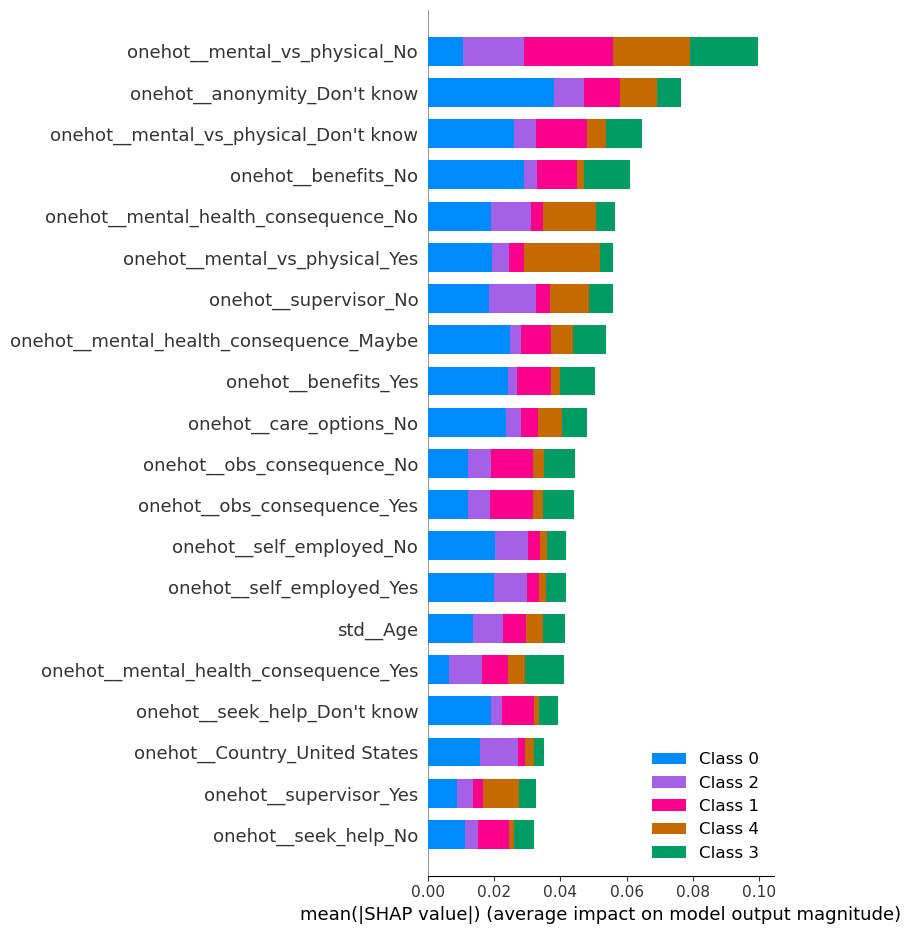

In [67]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names)

In [71]:
import shap
shap.initjs()
X_prep = grid.best_estimator_[0].transform(X_trains[0])
feature_names = preprocessor.get_feature_names_out()
a = shap.sample(X_prep, 4)
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict_proba, a)

X_test_transformed = grid.best_estimator_[0].transform(X_tests[0])
#print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed[:1000])
index = 37 #same index, explain class 4, very easy
print(explainer.expected_value[4]) 
shap.force_plot(explainer.expected_value[4], shap_values[4][index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

  0%|          | 0/205 [00:00<?, ?it/s]

0.13733314691884746


In [72]:
X_prep = grid.best_estimator_[0].transform(X_trains[0])
feature_names = preprocessor.get_feature_names_out()
a = shap.sample(X_prep, 4)
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict_proba, a)

X_test_transformed = grid.best_estimator_[0].transform(X_tests[0])
#print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed[:1000])
index = 37 #for don't know class
print(explainer.expected_value[0]) 
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

  0%|          | 0/205 [00:00<?, ?it/s]

0.4217181853437763
